<a href="https://colab.research.google.com/github/gouthamans14/deeplearning-tesnorflow/blob/main/CNN/ZTM_CV_01_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convulutional Nueral Network and Computer vision with TensorFlow

## Food 101

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-06-20 13:53:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  29.8MB/s    in 4.2s    

2023-06-20 13:53:29 (24.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [ ]:
os.walk("pizza_steak")

<generator object _walk at 0x7f3a7b02a6c0>

In [ ]:
for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

### Visualize our Images
#### Getting class names programatically

In [ ]:
#get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
data_dir
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
## Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory(we'll view images from here)
  target_folder = target_dir+"/"+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  #plt.axis(bool('off'))
  plt.title(target_class)



  print(f"Image shape: {img.shape}")
  return img



['945791.jpg']
Image shape: (512, 512, 3)


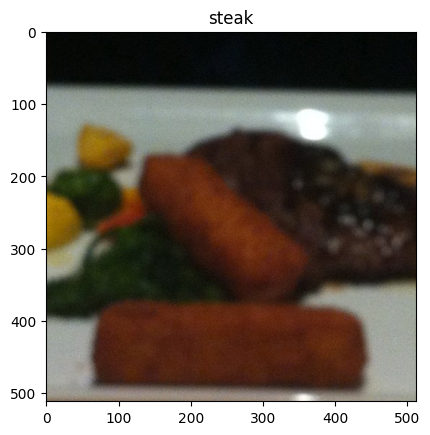

In [ ]:
img = view_random_image("pizza_steak/train","steak")

In [ ]:
#preprocess images to tensors
tf.constant(img)

<tf.Tensor: shape=(512, 289, 3), dtype=uint8, numpy=
array([[[ 64,  69,  62],
        [ 65,  68,  61],
        [ 69,  69,  61],
        ...,
        [ 52,  59,  67],
        [ 52,  59,  67],
        [ 44,  55,  77]],

       [[ 63,  68,  62],
        [ 63,  66,  59],
        [ 65,  66,  58],
        ...,
        [ 53,  60,  68],
        [ 52,  59,  67],
        [ 45,  56,  74]],

       [[ 66,  71,  65],
        [ 66,  69,  62],
        [ 67,  68,  60],
        ...,
        [ 55,  62,  70],
        [ 53,  60,  68],
        [ 49,  61,  75]],

       ...,

       [[ 96,  63,  28],
        [ 98,  65,  30],
        [101,  68,  33],
        ...,
        [ 30,  42,  42],
        [ 29,  41,  41],
        [ 34,  39,  43]],

       [[ 98,  65,  30],
        [ 99,  66,  31],
        [101,  68,  33],
        ...,
        [ 30,  42,  42],
        [ 29,  41,  41],
        [ 32,  35,  44]],

       [[100,  67,  32],
        [100,  67,  32],
        [101,  68,  33],
        ...,
        [ 31,  41,  4

In [ ]:
img.shape

(512, 289, 3)

### Preprocessing the data before passing it to the Nueral Network

#### Neural network prefers normalization that is getting value between 0 and 1

In [ ]:
img = img/255.

In [ ]:
img

array([[[0.25098039, 0.27058824, 0.24313725],
        [0.25490196, 0.26666667, 0.23921569],
        [0.27058824, 0.27058824, 0.23921569],
        ...,
        [0.20392157, 0.23137255, 0.2627451 ],
        [0.20392157, 0.23137255, 0.2627451 ],
        [0.17254902, 0.21568627, 0.30196078]],

       [[0.24705882, 0.26666667, 0.24313725],
        [0.24705882, 0.25882353, 0.23137255],
        [0.25490196, 0.25882353, 0.22745098],
        ...,
        [0.20784314, 0.23529412, 0.26666667],
        [0.20392157, 0.23137255, 0.2627451 ],
        [0.17647059, 0.21960784, 0.29019608]],

       [[0.25882353, 0.27843137, 0.25490196],
        [0.25882353, 0.27058824, 0.24313725],
        [0.2627451 , 0.26666667, 0.23529412],
        ...,
        [0.21568627, 0.24313725, 0.2745098 ],
        [0.20784314, 0.23529412, 0.26666667],
        [0.19215686, 0.23921569, 0.29411765]],

       ...,

       [[0.37647059, 0.24705882, 0.10980392],
        [0.38431373, 0.25490196, 0.11764706],
        [0.39607843, 0

## Building CNN

---



* Load our Images
* Preprocess our images
* Build a CNN to find patterns in our images
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/pizza_steak/train"
test_dir ="/content/pizza_steak/test"
#Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size=32,
                                              target_size=(224,224),#rshaping our 512,512 image to 224,224
                                              class_mode="binary", # we are working with twp classes
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size=32,
                                              target_size=(224,224),#rshaping our 512,512 image to 224,224
                                              class_mode="binary", # we are working with twp classes
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Building CNN

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])


In [ ]:
len(train_data)*32

1504

In [ ]:
1500/32

46.875

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 266ms/step - loss: 0.5987 - accuracy: 0.6567 - val_loss: 0.5715 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 14s 310ms/step - loss: 0.4373 - accuracy: 0.8040 - val_loss: 0.3555 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3925 - accuracy: 0.8353 - val_loss: 0.3407 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 13s 269ms/step - loss: 0.3695 - accuracy: 0.8553 - val_loss: 0.2912 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3381 - accuracy: 0.8620 - val_loss: 0.2963 - val_accuracy: 0.8740


In [ ]:
history_1.history

{'loss': [0.5986981391906738,
  0.4373009502887726,
  0.39254656434059143,
  0.369530588388443,
  0.33810338377952576],
 'accuracy': [0.6566666960716248,
  0.8040000200271606,
  0.8353333473205566,
  0.8553333282470703,
  0.8619999885559082],
 'val_loss': [0.5714837312698364,
  0.35545557737350464,
  0.34066107869148254,
  0.2912181317806244,
  0.29630881547927856],
 'val_accuracy': [0.7059999704360962,
  0.8500000238418579,
  0.8659999966621399,
  0.8820000290870667,
  0.8740000128746033]}

### Lets replicate non cnn model to work on image

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
    ])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
 3/47 [>.............................] - ETA: 5s - loss: 0.7507 - accuracy: 0.4896  

KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Binary Classification
* Become one with data
* Process the data ( Prepare it for modelling, scaling/normalizing and create batches)
* Created a model
* Fit the model
* Evaluate the model
* Adjust different parameters and improve the model
* Experiment until satisfied


#### Become one with data

['1961025.jpg']
Image shape: (512, 512, 3)
['774142.jpg']
Image shape: (384, 512, 3)


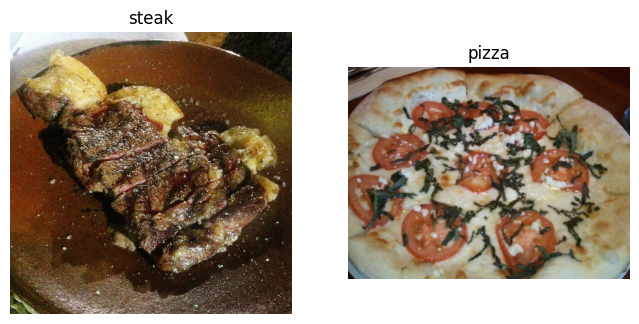

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")



#### Preprocess the data

* Split the data into training and test sets

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

* Turn data into batches.

A batch is a small subset of data. Rather than looking at all the data at once
our model might only look at 32 at a time

This is for couple of reaseons:


1.   10000 Images will not fit into our memory at one time.
2.   Trying to learn patterns of 10k images at one time could not results in good pattern identifications

* why 32?

Default batch size






In [6]:
### Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Creating train and test data loader from directory

train_data = train_datagen.flow_from_directory(directory =train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:

# get a sample of training data batch

images, labels =train_data.next() # will get the next batch of the training data

len(images), len(labels)

(32, 32)

#### Create a CNN model

* how to chose architecture?

Start with relatively simple model and scale according to the data.
Thera are infinite ways to create a DL architectures.
So start working on something simple which you can control and build on top of it


In [7]:
## We will start with a baseline model

### Making the modelling part a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D


In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="same",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3, padding="same", activation="relu"),
    Conv2D(10,3, padding="valid", activation="relu"),
    MaxPool2D(2,padding="same"),
    #Conv2D(10,3,, padding="same" activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [ ]:
model_4.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 conv2d_54 (Conv2D)          (None, 224, 224, 10)      910       
                                                                 
 conv2d_55 (Conv2D)          (None, 222, 222, 10)      910       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 123210)            0         
                                                                 
 dense_19 (Dense)            (None, 1)                 123211    
                                                     

In [ ]:
### Fit the Model
history_4 = model_4.fit(train_data, epochs=5,
           steps_per_epoch=len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
16/16 [==============================] - 9s 436ms/step - loss: 1.0989 - accuracy: 0.5200 - val_loss: 0.6682 - val_accuracy: 0.5680
Epoch 2/5
16/16 [==============================] - 5s 324ms/step - loss: 0.6366 - accuracy: 0.6580 - val_loss: 0.5849 - val_accuracy: 0.7900
Epoch 3/5
16/16 [==============================] - 6s 388ms/step - loss: 0.5147 - accuracy: 0.8060 - val_loss: 0.4271 - val_accuracy: 0.8120
Epoch 4/5
16/16 [==============================] - 5s 324ms/step - loss: 0.3840 - accuracy: 0.8340 - val_loss: 0.2963 - val_accuracy: 0.8920
Epoch 5/5
16/16 [==============================] - 6s 387ms/step - loss: 0.2823 - accuracy: 0.8780 - val_loss: 0.2352 - val_accuracy: 0.9140


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 153ms/step - loss: 0.2352 - accuracy: 0.9140


[0.23516592383384705, 0.9139999747276306]

### Evaluating baseline models

In [ ]:
import pandas as pd

history_4_df = pd.DataFrame(history_4.history)

In [ ]:
history_4_df.head()

In [ ]:
history_4_df.plot(figsize=(10,7),
    kind="line",xlabel="Epochs",ylabel="Loss", title="Loss-Curve")
plt.show()

In [ ]:
history_4.history["loss"]

In [ ]:
range(0, len(history_4.history["loss"]))

In [8]:
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation curves
    """

    train_loss = history.history["loss"]
    train_accuracy= history.history["accuracy"]
    val_loss   = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.figure()
    plt.plot(epochs,train_loss, label="Training_loss")
    plt.plot(epochs, val_loss, label="Val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

    #plot accuracy
    plt.figure()
    plt.plot(epochs, train_accuracy, label="Test Accuracy")
    plt.plot(epochs, val_accuracy, label="Val Accuracy")
    plt.title("Accuracy plot")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()



In [ ]:
plot_loss_curves(history_4)

#### Note: The Validation loss starts to go up - The model is overfitting
* it is not generalizing well

### Fitting a machine learning model:



1.   Create a baseline model
2.   Beat the baseline model by overfitting a large model.
3.   Reduce Overfitting.








### Ways to induce Overfitting:



*   Increase the conv layers
*   Increase the conv filters
*   Add another Dense layer to output of our flattened layer


### Ways to Reduce Overfitting:

* Add data augmentation
* Add regularization layers(Maxpool2D)
* Add more data

*** Note *** : Reducing overfitting is called Regularization






In [ ]:
### Create a model ( New baseline)

model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape =(224,224,3)),
    MaxPool2D(pool_size=2,padding="same"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs= 5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = len(test_data))

In [ ]:
history_5_df= pd.DataFrame(history_5.history)

In [ ]:
model_5.summary()

In [ ]:
model_5.summary()

In [ ]:
plot_loss_curves(history_5)

### Note:

* MaxPooling layer condensed the features, left down the unwanted features and there by reduces the number of parameters
also.

* This helps in reducing overfitting

### Opening our bag of tricks and finding data augmentations

### Data Augmentation:

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2, # Rotation of an image
    shear_range = 0.2, # How much shear in a image
    zoom_range = 0.2, # Zoom in randomly on a image
    width_shift_range=0.2, # Move your image on x axis
    height_shift_range = 0.3, # Move your image on Y axis
    horizontal_flip = True

)

# There are many more method to do Data augmentation

In [ ]:
train_datagen = ImageDataGenerator(1/255.)

test_datagen = ImageDataGenerator(1/255.)

In [ ]:
print("Augmented Train Data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory =train_dir,
                         target_size=(224,224),
                         class_mode="binary",
                         batch_size=32,
                          shuffle=False)

print("Non Augmented Train Data: ")
train_data = train_datagen.flow_from_directory(directory =train_dir,
                         target_size=(224,224),
                         class_mode="binary",
                         batch_size=32,
                          shuffle=False)

print("Non - Augmented Test Data: ")
test_data = test_datagen.flow_from_directory( directory =test_dir,
                                             target_size=(224,224),
                                              batch_size=32,
                                              shuffle= False

)

* Note: Data augmentation are done only on train data

* When we use image Data Generator built-in data augmentation parameters our images are left
as they are in the directories, but are modified as they're loaded into the model

### Visualize some data

In [ ]:
images_1, label = train_data.next()

In [ ]:
augmented_images , augmented_labels = train_data_augmented.next()

In [ ]:
# Show original Image and augmented image
import random
random_number = random.randint(0,32) #our batch size is 32
#random_number = 21

print(f"Showing random number {random_number}")
plt.imshow(images_1[random_number].astype('uint8'))
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)
plt.show()


# random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
# print(f"Random Image number: {random_number}")
# plt.imshow(images[random_number].astype('uint8'))
# plt.title(f"Original image")
# plt.axis(False)
# plt.figure()
# plt.imshow(augmented_images[random_number])
# plt.title(f"Augmented image")
# plt.axis(False);


Showing random number 21


NameError: ignored

In [ ]:
model_5.summary()

In [ ]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(2,padding="same"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2,padding="same"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2,padding="same"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics=["accuracy"])

#model_6.summary()

In [ ]:
model_6.summary()

In [ ]:
history_6 = model_6.fit(train_data_augmented,
                        steps_per_epoch = len(train_data_augmented),
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

In [ ]:
model_6.evaluate(test_data)

In [ ]:
plot_loss_curves(history_6)

In [ ]:
print("Augmented Train Data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory =train_dir,
                         target_size=(224,224),
                         class_mode="binary",
                         batch_size=32,
                          shuffle=False)

print("Non Augmented Train Data: ")
train_data = train_datagen.flow_from_directory(directory =train_dir,
                         target_size=(224,224),
                         class_mode="binary",
                         batch_size=32,
                          shuffle=False)

print("Non - Augmented Test Data: ")
test_data = test_datagen.flow_from_directory( directory =test_dir,
                                             target_size=(224,224),
                                              batch_size=32,
                                              shuffle= False

)

Augmented Train Data: 
Found 1500 images belonging to 2 classes.
Non Augmented Train Data: 
Found 1500 images belonging to 2 classes.
Non - Augmented Test Data: 
Found 500 images belonging to 2 classes.


In [ ]:
### Shufflng the data

train_datagen_augmented = ImageDataGenerator(rescale=1/244.)

train_datagen = ImageDataGenerator(rescale=1/244.)

test_datagen = ImageDataGenerator(rescale=1/244.)

In [ ]:
train_data_aug =train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                            target_size=(224,224),
                                                            batch_size=32,
                                                            shuffle=True,
                                                            class_mode="binary")

train_data = train_datagen.flow_from_directory(directory=test_dir,
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=True)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics=["accuracy"])

In [ ]:
train_data_aug.next()

(array([[[[0.7459016 , 0.6475409 , 0.3852459 ],
          [0.7540983 , 0.65573764, 0.3934426 ],
          [0.69672126, 0.5983606 , 0.35245898],
          ...,
          [0.7663934 , 0.60655737, 0.2991803 ],
          [0.7418032 , 0.57377046, 0.24590163],
          [0.6393442 , 0.454918  , 0.17622949]],
 
         [[0.7377049 , 0.61885244, 0.34016392],
          [0.7950819 , 0.6844262 , 0.4016393 ],
          [0.7459016 , 0.6311475 , 0.36475408],
          ...,
          [0.7663934 , 0.60655737, 0.2991803 ],
          [0.65983605, 0.48360652, 0.15983605],
          [0.5901639 , 0.40983605, 0.11885245]],
 
         [[0.72131145, 0.5901639 , 0.28278688],
          [0.82377046, 0.6926229 , 0.3934426 ],
          [0.77459013, 0.6516393 , 0.36475408],
          ...,
          [0.7459016 , 0.57377046, 0.27868852],
          [0.6762295 , 0.4959016 , 0.18852457],
          [0.5819672 , 0.38934425, 0.10245901]],
 
         ...,
 
         [[0.6311475 , 0.4877049 , 0.24999999],
          [0.65573

In [ ]:
history_7 = model_7.fit( train_data_aug,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 17s 1s/step - loss: 0.6813 - accuracy: 0.5984 - val_loss: 0.6423 - val_accuracy: 0.7280
Epoch 2/5
16/16 [==============================] - 23s 1s/step - loss: 0.6438 - accuracy: 0.6406 - val_loss: 0.5746 - val_accuracy: 0.7080
Epoch 3/5
16/16 [==============================] - 16s 1s/step - loss: 0.5713 - accuracy: 0.7087 - val_loss: 0.5008 - val_accuracy: 0.7720
Epoch 4/5
16/16 [==============================] - 17s 1s/step - loss: 0.4844 - accuracy: 0.7618 - val_loss: 0.4630 - val_accuracy: 0.7780
Epoch 5/5
16/16 [==============================] - 16s 1s/step - loss: 0.5424 - accuracy: 0.7363 - val_loss: 0.4530 - val_accuracy: 0.8180


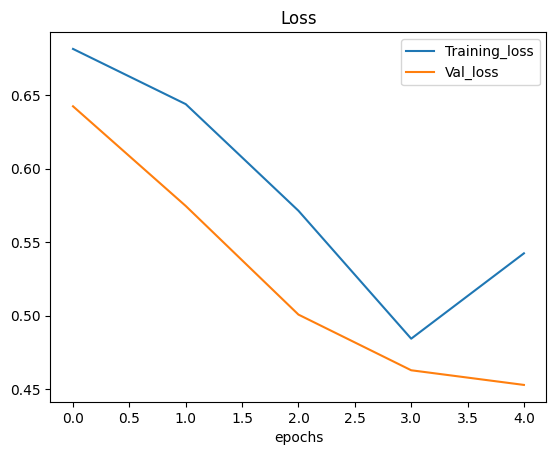

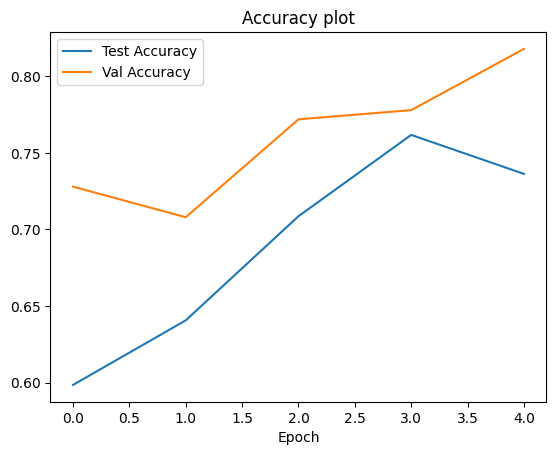

In [ ]:
plot_loss_curves(history_7)

### Repeat the model till it is satisfied

* Increase the number of model layers ( Conv2D, Max_pool2d)
* Increase the number of filters (10 or 32 or 64)
* Train for more epoch
* Find an ideal learning rate
* More Data
* Use Transfer learning

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

In [ ]:
    # Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 80s 2s/step - loss: 0.5829 - accuracy: 0.6807 - val_loss: 0.4183 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 77s 2s/step - loss: 0.4493 - accuracy: 0.8020 - val_loss: 0.3401 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 79s 2s/step - loss: 0.4099 - accuracy: 0.8153 - val_loss: 0.3466 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 78s 2s/step - loss: 0.3691 - accuracy: 0.8420 - val_loss: 0.3328 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 78s 2s/step - loss: 0.3328 - accuracy: 0.8627 - val_loss: 0.3414 - val_accuracy: 0.8620


In [ ]:
model_8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
model_8.evaluate(test_data)

16/16 [==============================] - 9s 482ms/step - loss: 0.3414 - accuracy: 0.8620


[0.34142157435417175, 0.8619999885559082]

### Making Predictions with custom data


In [ ]:
### Class name
print(class_names)

['pizza' 'steak']


--2023-06-20 09:14:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-06-20 09:14:06 (30.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



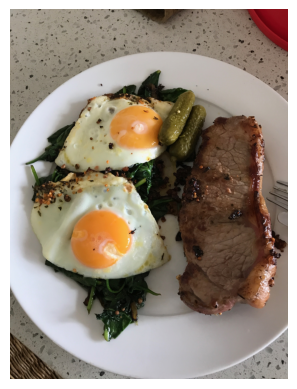

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
expanded_steak = tf.expand_dims(steak,axis=0).shape

In [ ]:
model_8.predict(expanded_steak)

ValueError: ignored

#### Helper Function to preprocess our Image to predict

In [70]:
 def load_prep_image(filename, image_shape=224):

    """
    Reads an image from filename, turns it to tensor and reshapes it to
    (img_shape,img_shap,color_channels)

    """
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,[image_shape,image_shape])
    img = img/255.

    return img




In [ ]:
img = tf.io.read_file("steak pizza.jpg")
img = tf.image.decode_image(img)
img = tf.image.resize(img,[224,224])
img = img/255.
img_exp = tf.expand_dims(img,axis=0)


In [ ]:
# We get the prediction Probablity
pred = model_7.predict(img_exp)
classes[pred]

1/1 [==============================] - 0s 58ms/step


NameError: ignored

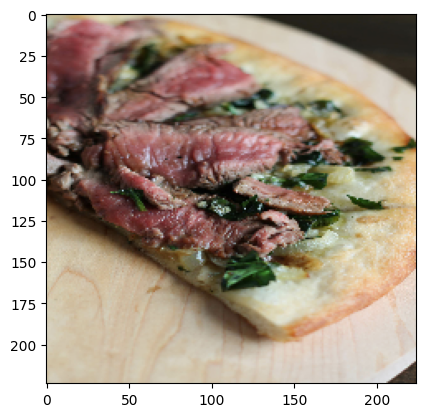

In [ ]:
plt.imshow(img)

In [ ]:
# We get the prediction Probablity
pred = model_7.predict(tf.expand_dims(load_prep_image("03-steak.jpeg"),axis=0))

1/1 [==============================] - 0s 37ms/step


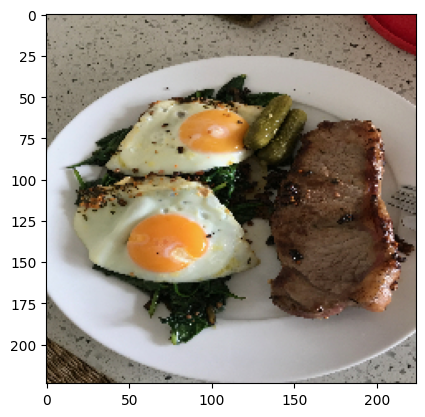

In [ ]:
plt.imshow(load_prep_image("03-steak.jpeg"))
plt.show()

#### Writing a helper function to determine the class and visualize it

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]



In [ ]:
pred_class

'steak'

In [42]:
def pred_plot(model,filename,class_name=class_names):

    """
    Import the image , makes prediction with the model passed and plot the image
    to predict the title

    """

    img = load_prep_image(filename)


    pred = model.predict(tf.expand_dims(img,axis=0))
    pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(f"Predicted Class: {pred_class}", color="r")
    plt.axis =False


(224, 224, 3)
1/1 [==============================] - 0s 80ms/step


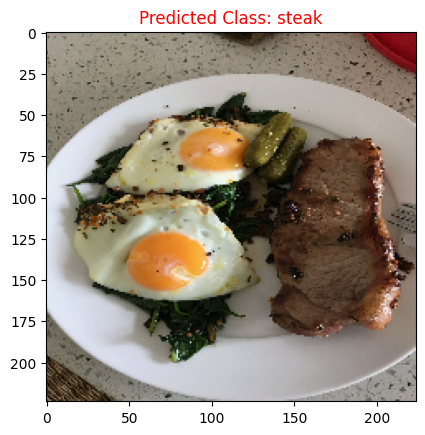

In [ ]:
pred_plot(model_8, "03-steak.jpeg" )

#### Trying out with another image


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-06-20 09:51:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-06-20 09:51:36 (37.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 127ms/step


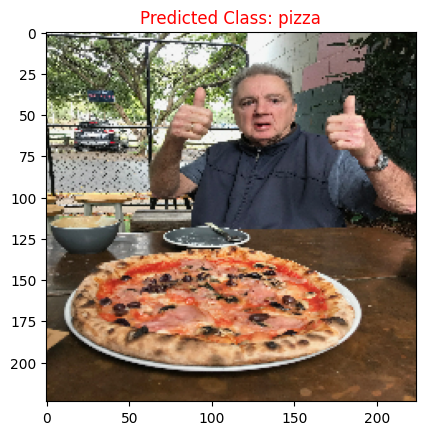

In [ ]:
pred_plot(model_8, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 31ms/step


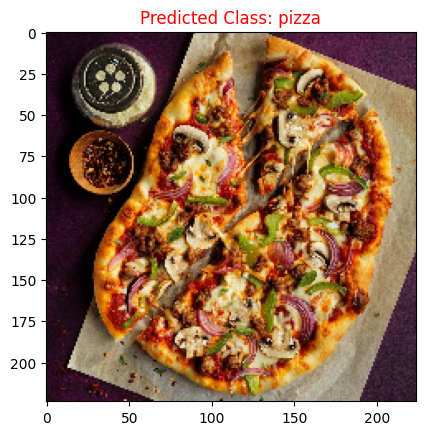

In [ ]:
pred_plot(model_8,"pizza_test1.jpg")

## MultiClass Classification

In [ ]:
img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,[image_shape,image_shape])
    img = img/255.

In [ ]:
img = tf.io.read_file("pizza_test1.jpg")

In [ ]:
img = tf.image.decode_image(img)

In [ ]:
tf.image.resize(img, [224,224])/255.

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.14029612, 0.04617847, 0.10892357],
        [0.12094838, 0.03859544, 0.09741897],
        [0.11354543, 0.03119248, 0.09001601],
        ...,
        [0.26442674, 0.10886463, 0.21474698],
        [0.26454616, 0.1312128 , 0.22925201],
        [0.20668206, 0.08903501, 0.18315265]],

       [[0.1262105 , 0.03209285, 0.09483795],
        [0.10580233, 0.02344938, 0.08227292],
        [0.12238895, 0.04003601, 0.09885954],
        ...,
        [0.32851362, 0.17165087, 0.27753323],
        [0.25960276, 0.10600135, 0.21188371],
        [0.19069596, 0.05568193, 0.15456149]],

       [[0.10858344, 0.01446579, 0.07721089],
        [0.11514606, 0.03279311, 0.09161665],
        [0.10918368, 0.03859544, 0.09349741],
        ...,
        [0.30293876, 0.1678048 , 0.26674435],
        [0.25538343, 0.10244223, 0.2083246 ],
        [0.35604405, 0.18741661, 0.29722053]],

       ...,

       [[0.14575829, 0.04741901, 0.12987196],
        [0.13

(224, 224, 3)
1/1 [==============================] - 0s 43ms/step


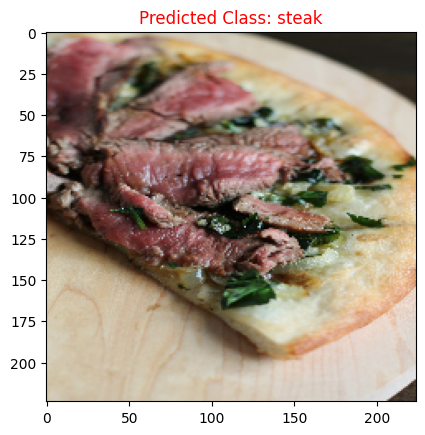

In [ ]:
pred_plot(model_8, "steak pizza.jpg")

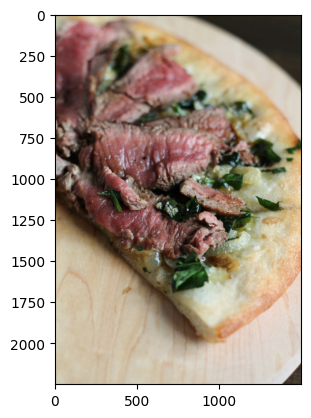

In [ ]:

img =tf.io.read_file("steak pizza.jpg")
img = tf.image.decode_image(img)
plt.imshow(img)
img.shape
img = tf.image.resize(img,[244,244])
img = img/255.
img_exp = tf.expand_dims(img,axis=0)

### Multi-class Classification

### Steps:

1) Becoming one with the data <br>
2) Preprocess the data.<br>
3) Create a model.<br>
4) Fit the model.<br>
5) Evaluate the model.<br>
6) Adjust different hyperparameters to improve the model<br>
7) Repeat until satisfied.<br>


In [9]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-06-20 14:04:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.128, 173.194.174.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  30.9MB/s    in 17s     

2023-06-20 14:04:55 (28.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
import os

#walk through 10 classes

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 10 directories and 0 imag

In [11]:
train_dir = "10_food_classes_all_data/train/"
test_dir ="10_food_classes_all_data/test/"


#### 1) Visualize Visualize Visualize

In [12]:
import pathlib
import numpy as np

data_dir= pathlib.Path(test_dir) # Cpnverts path to python object

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2720223.jpg']
Image shape: (512, 512, 3)


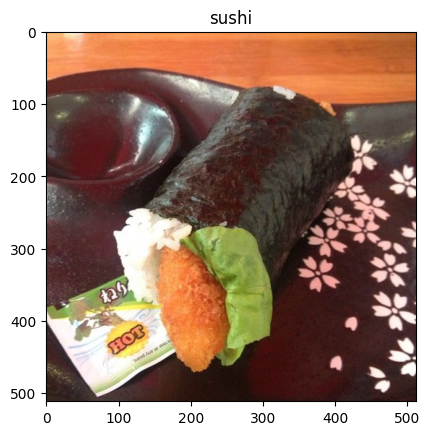

In [13]:
import random
img = view_random_image( target_dir=train_dir,target_class=random.choice(class_names))

#### 2) Preprocessing Images

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# train_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/225.)

In [17]:
train_data = train_datagen.flow_from_directory(
    directory =train_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed = 42
)

Found 7500 images belonging to 10 classes.


In [18]:
test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size=(224,224),
    class_mode="categorical",
    batch_size=32,
    seed=42,
    shuffle=True

)

Found 2500 images belonging to 10 classes.


#### 3) Create a CNN Model

In [19]:
model_9 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

In [20]:
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])



#### 4) Fit the model

In [22]:
history_9 =model_9.fit( train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 59s 253ms/step - loss: 1.8556 - accuracy: 0.3649 - val_loss: 1.8824 - val_accuracy: 0.3456
Epoch 2/10
235/235 [==============================] - 55s 233ms/step - loss: 1.5449 - accuracy: 0.4840 - val_loss: 1.9631 - val_accuracy: 0.3372
Epoch 3/10
235/235 [==============================] - 58s 245ms/step - loss: 0.9818 - accuracy: 0.6808 - val_loss: 2.4003 - val_accuracy: 0.3292
Epoch 4/10
235/235 [==============================] - 54s 231ms/step - loss: 0.4147 - accuracy: 0.8709 - val_loss: 3.7931 - val_accuracy: 0.2964
Epoch 5/10
235/235 [==============================] - 54s 230ms/step - loss: 0.1587 - accuracy: 0.9540 - val_loss: 4.9121 - val_accuracy: 0.2864
Epoch 6/10
235/235 [==============================] - 55s 233ms/step - loss: 0.0617 - accuracy: 0.9839 - val_loss: 6.0489 - val_accuracy: 0.2968
Epoch 7/10
235/235 [==============================] - 62s 264ms/step - loss: 0.0292 - accuracy: 0.9924 - val_loss: 6.5907 - val_ac

#### 5) Evaluate the model

In [ ]:
model.evaluate(test_data)

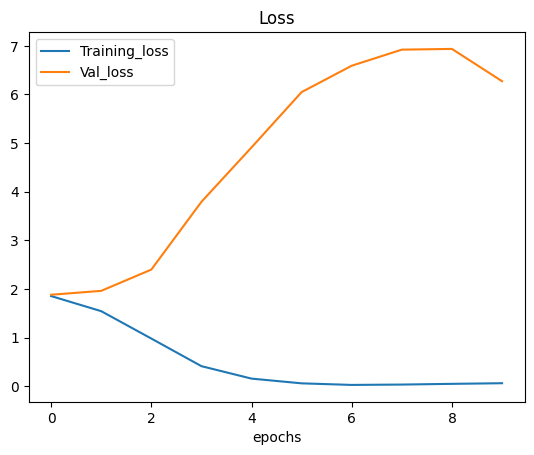

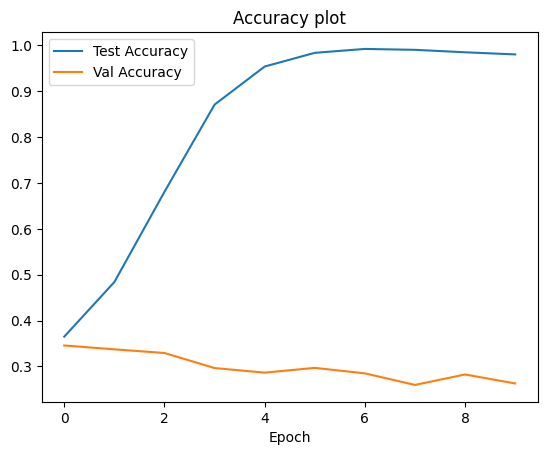

In [23]:
plot_loss_curves(history_9)

* Observation:<br>
1) The gap between the training and validation curve tells us that
 the model clearly over fits <br>
2) It performs badly on the testdata <br>

#### 6) Adjust Model Parameters:

To prevent overfitting:

* **Get More data :**
Having more data helps model to learn more patterns, which generalizes to the new examples

* **Simplify the model** :
The current model is already overfitting, so the model may be too complicated
One way to reduce the model complexity is to reduce the number of layers, to reduce number of hidden units in each layer.

* **Use Data Augmentation** : Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

* Use Transfer learning



In [25]:
model_10 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_10=model_10.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 69s 278ms/step - loss: 2.0935 - accuracy: 0.2445 - val_loss: 1.9717 - val_accuracy: 0.3020
Epoch 2/5
235/235 [==============================] - 86s 365ms/step - loss: 1.7572 - accuracy: 0.4063 - val_loss: 1.9118 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 71s 302ms/step - loss: 1.3609 - accuracy: 0.5576 - val_loss: 2.0107 - val_accuracy: 0.3556
Epoch 4/5
235/235 [==============================] - 53s 224ms/step - loss: 0.8919 - accuracy: 0.7281 - val_loss: 2.2093 - val_accuracy: 0.3436
Epoch 5/5
235/235 [==============================] - 52s 223ms/step - loss: 0.5082 - accuracy: 0.8609 - val_loss: 2.6384 - val_accuracy: 0.3104


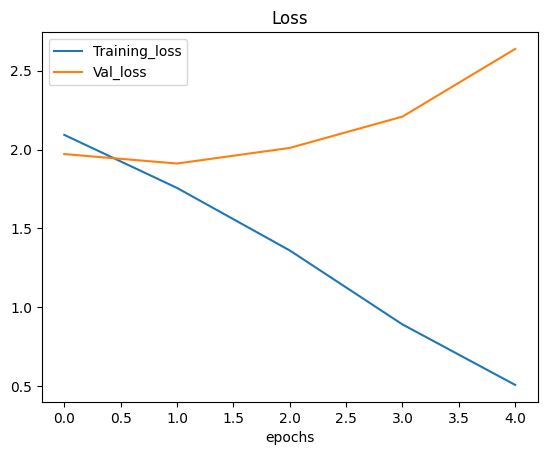

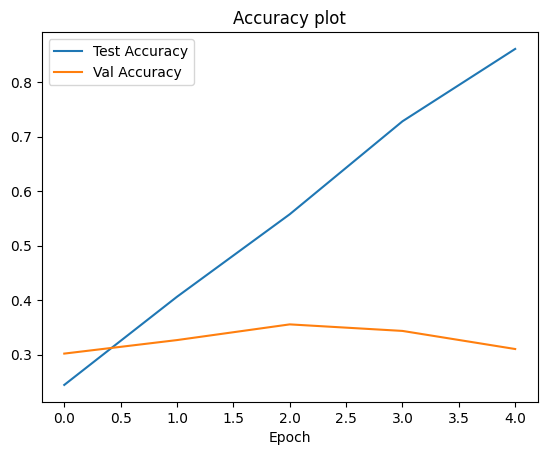

In [26]:
plot_loss_curves(history_10)

#### Trying Data Augmentation:

In [27]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       class_mode="categorical",
                                                       target_size=(224,224),
                                                       batch_size=32)

Found 7500 images belonging to 10 classes.


In [34]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.summary()

model_11.compile(loss="categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer = Adam())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [36]:
history_11 = model_11.fit(train_data_aug,
             epochs=5,
             steps_per_epoch=len(train_data_aug),
             validation_data = test_data,
             validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 141s 599ms/step - loss: 2.1171 - accuracy: 0.2359 - val_loss: 1.9335 - val_accuracy: 0.3212
Epoch 2/5
235/235 [==============================] - 131s 556ms/step - loss: 2.0241 - accuracy: 0.2864 - val_loss: 1.8513 - val_accuracy: 0.3684
Epoch 3/5
235/235 [==============================] - 130s 553ms/step - loss: 1.9865 - accuracy: 0.3048 - val_loss: 1.8677 - val_accuracy: 0.3632
Epoch 4/5
235/235 [==============================] - 130s 554ms/step - loss: 1.9361 - accuracy: 0.3253 - val_loss: 1.8034 - val_accuracy: 0.3828
Epoch 5/5
235/235 [==============================] - 130s 553ms/step - loss: 1.9165 - accuracy: 0.3420 - val_loss: 1.8213 - val_accuracy: 0.3888


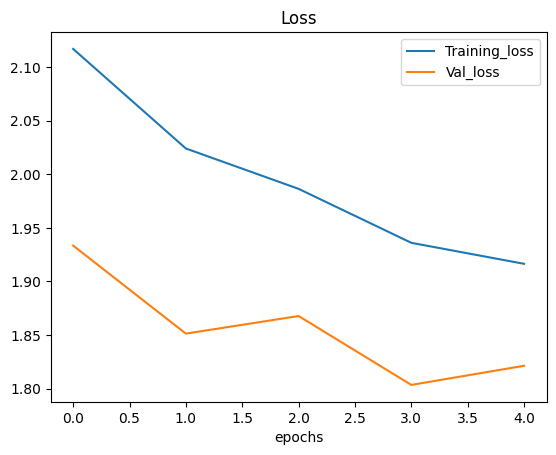

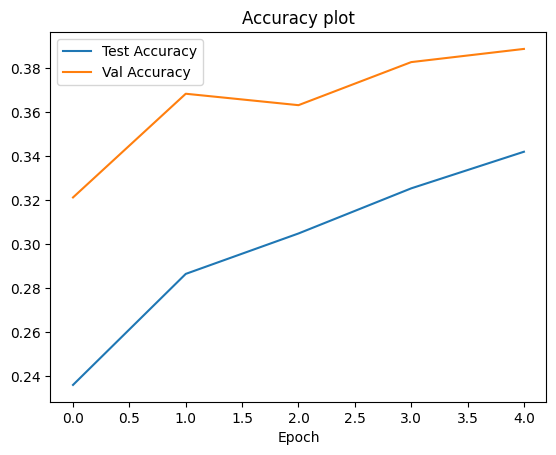

In [37]:
plot_loss_curves(history_11)

In [38]:
model_11.evaluate(test_data)

79/79 [==============================] - 16s 196ms/step - loss: 1.8213 - accuracy: 0.3888


[1.8213119506835938, 0.3887999951839447]

In [39]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg



#### Making a prediction with our trained model

##### Reconfing Pred and Plot to work with multi class problems

In [94]:
def pred_plot(model,filename,class_names):

    """
    Import the image , makes prediction with the model passed and plot the image
    to predict the title

    """

    img = load_prep_image(filename)


    pred = model.predict(tf.expand_dims(img,axis=0))
    print(f"Length: {len(pred[0])}")
    print(tf.argmax(pred[0]))
    if len(pred[0])>1:
      pred_class = class_names[tf.argmax(pred[0])]

    else:
      pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(f"Predicted Class: {pred_class}", color="r")
    plt.axis =False


1/1 [==============================] - 0s 21ms/step
Length: 10
tf.Tensor(0, shape=(), dtype=int64)


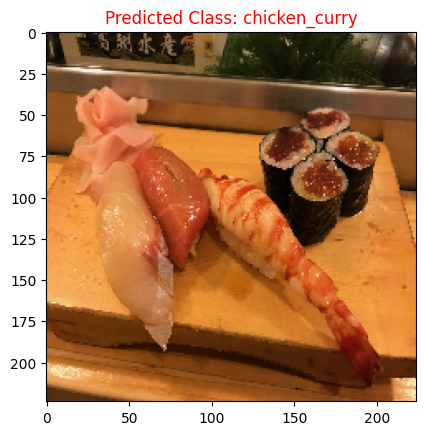

In [99]:
pred_plot(model=model_11,
              filename="03-sushi.jpeg",
              class_names=list(class_names))

* **Conclusion:** This model achieved only 30 percent of accuracy

#### Saving the model

In [100]:
model_11.save("saved_trained_model_11")

#### Load the saved model

In [102]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")


In [103]:
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 14s 170ms/step - loss: 1.8213 - accuracy: 0.3888


[1.8213117122650146, 0.3887999951839447]

In [104]:
model_11.evaluate(test_data)

79/79 [==============================] - 14s 174ms/step - loss: 1.8213 - accuracy: 0.3888


[1.8213114738464355, 0.3887999951839447]